In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8310, 0.5388, 0.2433],
        [0.9680, 0.2780, 0.6446],
        [0.5249, 0.2085, 0.5182],
        [0.0698, 0.8978, 0.9949],
        [0.2122, 0.7649, 0.4183]])


# XOR(퍼셉트론을 사용해서 해결)

## AND, OR, NAND

- y = (x1 * w1) + (x2 * w2) + b   # b: 절편
- -b = (x1 * w1) + (x2 * w2)
-  b = -{(x1 * w1) + (x2 * w2)}    # b: 바이어스(편견), __절편xx__

논리회로

### CPU가 하는 일 :: 
__덧셈밖에 못함__, 전가산기(반가산기)라고 부름

In [ ]:
import numpy as np

# ❗w, b값을 내가 계산함
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
    # w1, w2, theta = 0.5,0.5,0.7   #w1과 w2를 정하는 문제
    # y = (x1 * w1) + (x2 * w2)
    # if y >= theta:
    #     return 1
    # else:
    #     return 0

# 입력, 출력
# 0,0 -> 0
# 0,1 -> 0
# 1,0 -> 0
# 1,1 -> 1
print(f'{AND(0,0)=}, {AND(0,1)=}, {AND(1,0)=}, {AND(1,1)=}')


AND(0,0)=0, AND(0,1)=0, AND(1,0)=0, AND(1,1)=1


In [ ]:
# AND에서 기울기, 절편에 반대부호를 주면 'NAND'
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

print(f'{NAND(0,0)=}, {NAND(0,1)=}, {NAND(1,0)=}, {NAND(1,1)=}')


NAND(0,0)=1, NAND(0,1)=1, NAND(1,0)=1, NAND(1,1)=0


In [ ]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5]) # ❗머신러닝을 이용해서 찾아줌
    b = -0.2
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

print(f'{OR(0,0)=}, {OR(0,1)=}, {OR(1,0)=}, {OR(1,1)=}')

OR(0,0)=0, OR(0,1)=1, OR(1,0)=1, OR(1,1)=1


#### XOR의 은닉층
- ```입력``` -> ```은닉층```: NAND -> OR -> AND -> ```출력```



#### 모든 머신러닝은 퍼셉트론이다 == 은닉계층을 가지고 있다
- LeNet-5: 저자이름+네트워크+5계층 || ResNET-128: ...+128계층(은닉층 개수)
- 은닉층에 머신러닝 모델을 끼워넣어서 ```기울기와 바이어스를 구함```
- (미분(기울기를 구하는 것))역전파:: ```기울기 자동조정```, **최적화는 불가능
    - 출력과 답안을 비교해서 나온 오차를 통해 기울기 조정
### 결론=> 딥러닝 = 퍼셉트론 + 역전파
- 기울기 자동조정이되면 딥러닝
- 모든 딥러닝은 전역최적화가 되었냐는 질문에 '아니오'임, 최선이냐에 '예'

In [ ]:
# 계층을 활용한 퍼셉트론
def XOR(x1, x2):
   s1 = NAND(x1, x2)
   s2 = OR(x1, x2)
   y = AND(s1, s2)
   return y

print(f'{XOR(0,0)=}, {XOR(0,1)=}, {XOR(1,0)=}, {XOR(1,1)=}')

XOR(0,0)=0, XOR(0,1)=1, XOR(1,0)=1, XOR(1,1)=0


In [16]:
print(f'AND:: {AND(0,0)=}, {AND(0,1)=}, {AND(1,0)=}, {AND(1,1)=}')
print(f'NAND:: {NAND(0,0)=}, {NAND(0,1)=}, {NAND(1,0)=}, {NAND(1,1)=}')
print(f'OR:: {OR(0,0)=}, {OR(0,1)=}, {OR(1,0)=}, {OR(1,1)=}')
print(f'{XOR(0,0)=}, {XOR(0,1)=}, {XOR(1,0)=}, {XOR(1,1)=}')

AND:: AND(0,0)=0, AND(0,1)=0, AND(1,0)=0, AND(1,1)=1
NAND:: NAND(0,0)=1, NAND(0,1)=1, NAND(1,0)=1, NAND(1,1)=0
OR:: OR(0,0)=0, OR(0,1)=1, OR(1,0)=1, OR(1,1)=1
XOR(0,0)=0, XOR(0,1)=1, XOR(1,0)=1, XOR(1,1)=1


# 시각적으로 확인하는 경사하강법

### 경사하강법:: 
함수의 기울기를 이용해서 y의 값이 낮아지는 방향으로 점진적으로 이동하면서 최적값을 찾는 반복적인 최적화 작업

In [22]:
from chapter0 import *
import numpy as np

In [ ]:
# 정답지
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)   # ❗약간의 noise추가
y = true_b + ( true_w * x) + epsilon

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

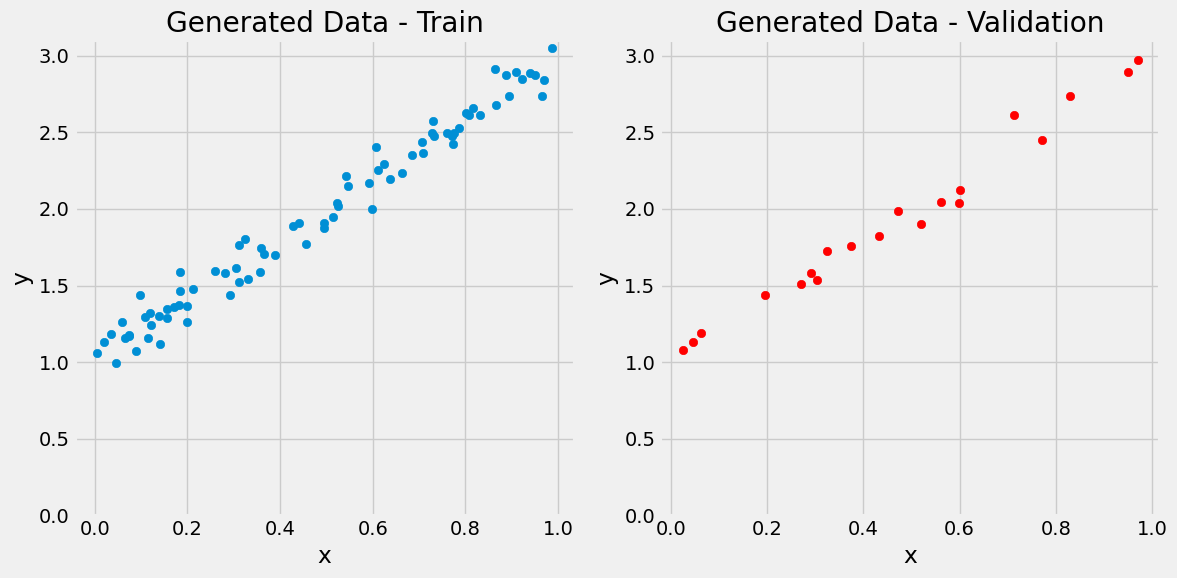

In [ ]:
# 2:8로 섞음
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[: int(N * 0.8)]
val_idx = idx[int(N * 0.8): ]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train, y_train, x_val, y_val)

## 경사 하강법

### step0. 무작위 초기화
- 딥러닝의 초기화는 무조건 무작위(vs. 머신러닝은 상한과 하한이 정해져 있음)
- 딥러닝은 왜 잘 되는지 아무도 모름

In [28]:
np.random.seed(42)  #파이썬은 제일 위에두면 밑에 다 먹히는데 ipython은 각 셀마다 추가해야함
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

[0.49671415] [-0.1382643]


### step1. 모델의 예측 계산

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

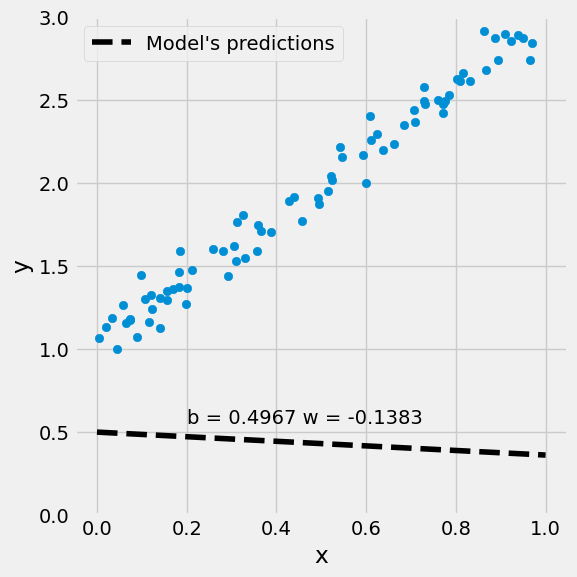

In [ ]:
yhat = b + w * x_train
figure2(x_train, y_train, b, w)
# 선이 내리꽂히는 b, w값 => xx, scatter그래프를 따라가야함

### step2. 손실 계산

e = y - y_hat

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

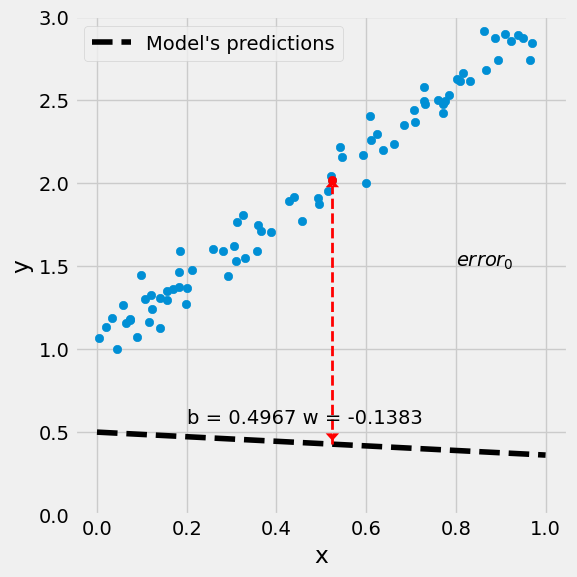

In [30]:
figure3(x_train, y_train, b, w)

In [31]:
error = yhat - y_train
loss = (error**2).mean()
print(loss)

2.6873100704937336


- 무작위로 초기화되 매개변수에 해당하는 손실값을 계산
- 손실을 어떻게 줄이죠? => 기울기를 어떻게 조정하죠? ( w를 조정, b를 고정)

In [32]:
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
bs, ws = np.meshgrid(b_range, w_range)
print(bs.shape, ws.shape)

(101, 101) (101, 101)


In [ ]:
# 샘플 예제
sample_x = x_train[0]
sample_yhat = bs + ws + sample_x
sample_yhat.shape

(101, 101)

파이토치에서 반복문을 쓰면 너무 느림, 안 쓰는게 관례

In [ ]:
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, axis=1, arr=x_train) # ❗반복계산을 통해 모든 포인트의 답안을 구함
all_predictions

array([[[-2.52475643e+00, -2.46475643e+00, -2.40475643e+00, ...,
          3.35524357e+00,  3.41524357e+00,  3.47524357e+00],
        [-2.49327105e+00, -2.43327105e+00, -2.37327105e+00, ...,
          3.38672895e+00,  3.44672895e+00,  3.50672895e+00],
        [-2.46178566e+00, -2.40178566e+00, -2.34178566e+00, ...,
          3.41821434e+00,  3.47821434e+00,  3.53821434e+00],
        ...,
        [ 5.60811386e-01,  6.20811386e-01,  6.80811386e-01, ...,
          6.44081139e+00,  6.50081139e+00,  6.56081139e+00],
        [ 5.92296772e-01,  6.52296772e-01,  7.12296772e-01, ...,
          6.47229677e+00,  6.53229677e+00,  6.59229677e+00],
        [ 6.23782158e-01,  6.83782158e-01,  7.43782158e-01, ...,
          6.50378216e+00,  6.56378216e+00,  6.62378216e+00]],

       [[-2.70685734e+00, -2.64685734e+00, -2.58685734e+00, ...,
          3.17314266e+00,  3.23314266e+00,  3.29314266e+00],
        [-2.66444590e+00, -2.60444590e+00, -2.54444590e+00, ...,
          3.21555410e+00,  3.27555410e

(80, 1, 1)
(80, 101, 101)
(101, 101)


(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

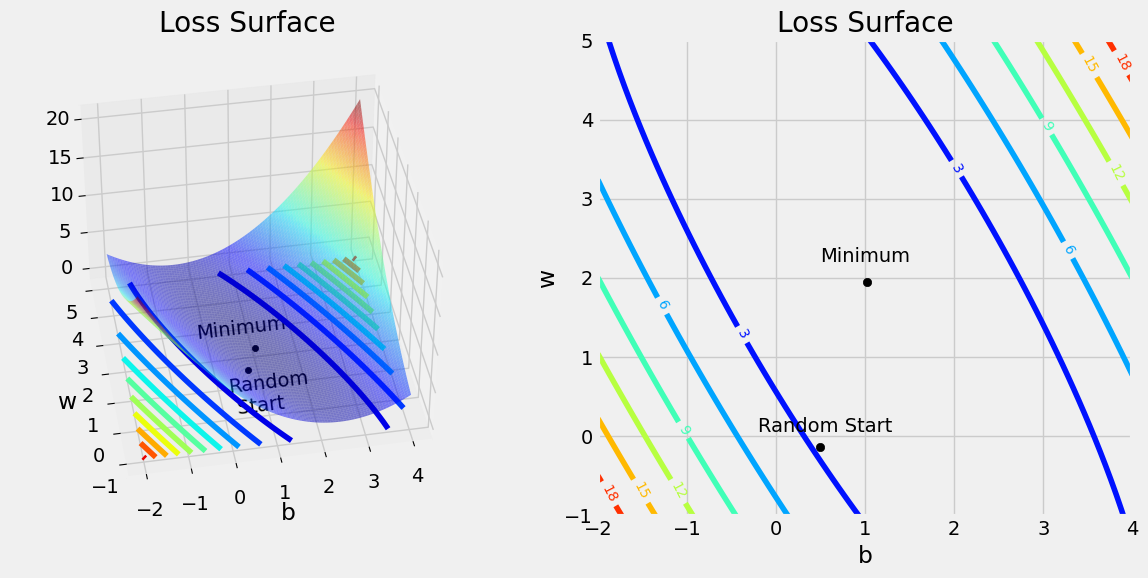

In [ ]:
all_labels = y_train.reshape(-1, 1, 1) # 레이블 형태 바꿈
print(all_labels.shape)
all_errors = all_predictions - all_labels
print(all_errors.shape)
all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)
figure4(x_train, y_train, b, w, bs, ws, all_losses)
# 결과: random Start지점 안으로 못 들어와서 Minimum쪽으로 못가는 중

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

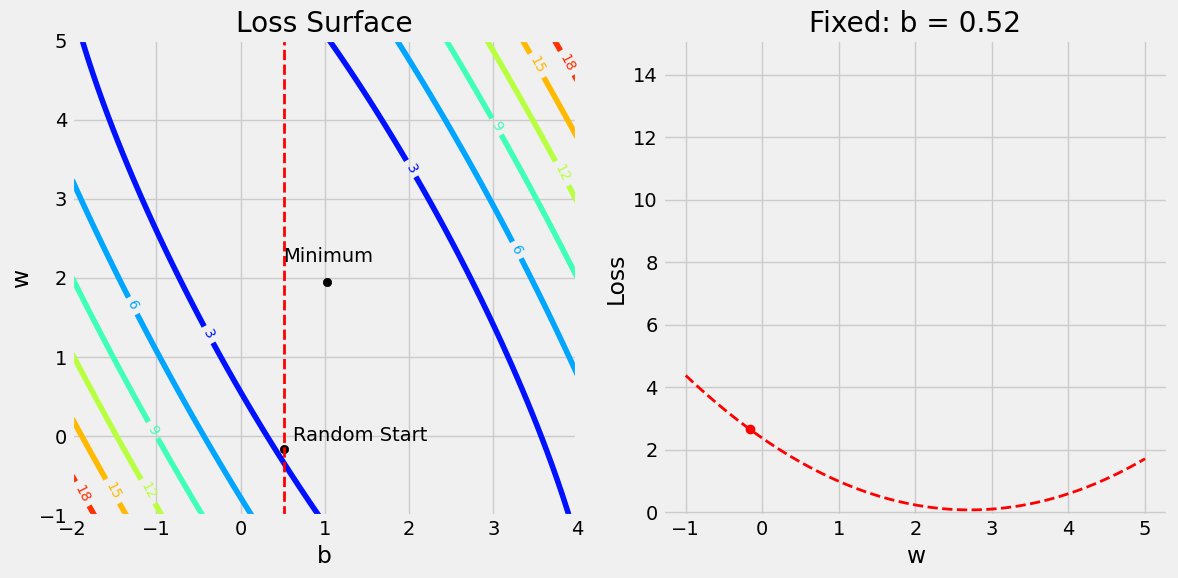

In [ ]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)
# 결과: random Start 위로 그려진 선쪽으로 못치고 들어옴, 바이어스 값 때문에
# 바이어스는 전역에 하나, 값을 고칠 수 없음

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

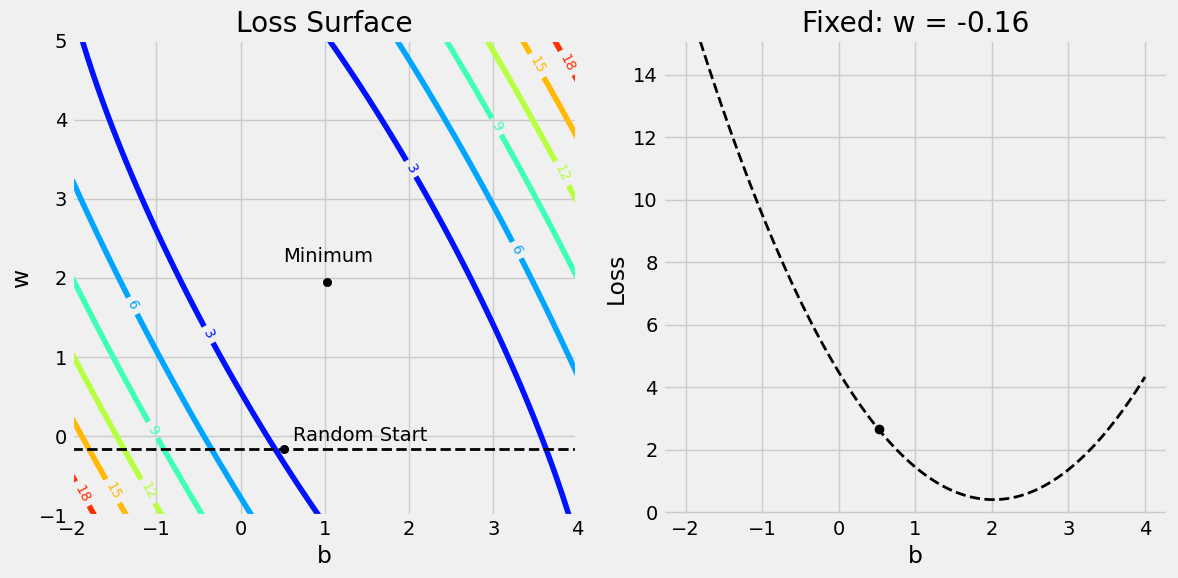

In [ ]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)
# 결과: 최적값은 2

편미분: w만 편애 -> w만 고쳐서 minumun으로 가는거 가능?? 무한한 시간이 주어지면 ㅇㅇ
경사하강법은 오차 많이나는것을 허락하지않는다. => 방향은 맞는데 속도가 느림

### step3. 경사를 계산

In [ ]:
# 왜 상수 2를 곱하는가 => 편미분으로 값을 뽑으면 2가 나온다고 가정
b_grad = 2 * error.mean()
w_grad = 2 * ( x_train * error).mean()
print(b_grad, w_grad)

-3.0236552083651467 -1.8015745816702569


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

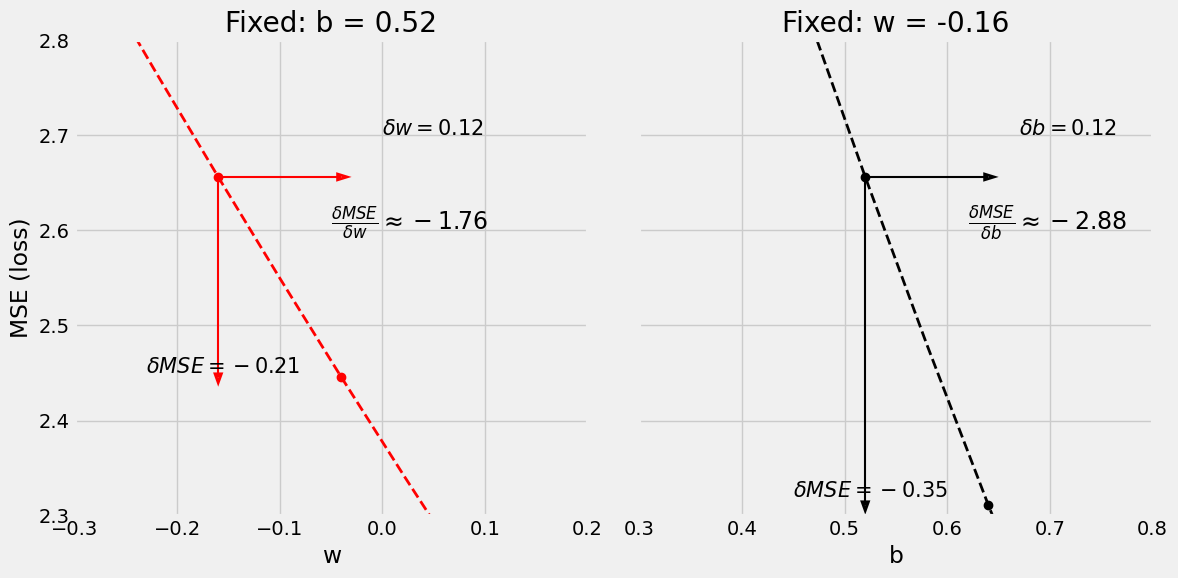

In [43]:
figure8(b, w, bs, ws, all_losses)

In [ ]:
lr = 0.1 # 학습율(learnig rate):: 딥러닝의 하이퍼파라미터:: 미분을 하는 횟수를 크게할수록 
print(b, w)

b = b - lr * b_grad ## ❗lr:: 변경폭이 너무 커지는 것을 막기위해서
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.79907967] [0.04189316]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

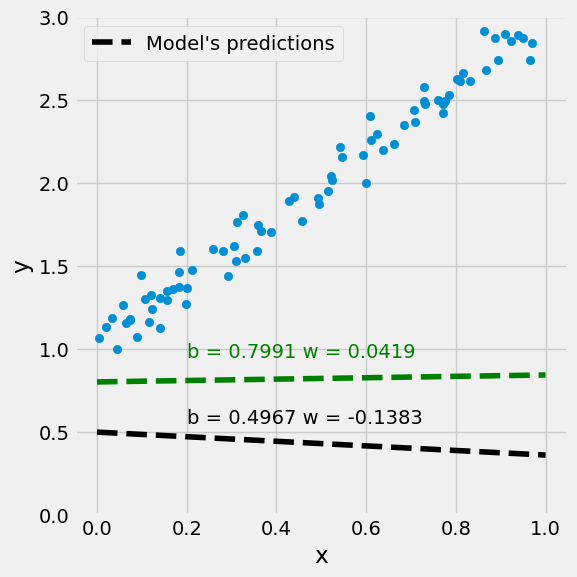

In [ ]:
figure9(x_train, y_train, b, w)
# 편미분은 한번만 계산하면 2가 나옴
# w값이 변경되면서 b값도 변ㄴ경
# 오차를 가져와서 b, w값을 다시 구함

### 반복(!!)

# 파이토치를 사용한 회귀

In [ ]:
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset

from sklearn.linear_model import LinearRegression #SGDRegressor:: sklearn의 경사하강법

In [ ]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)   # ❗약간의 noise추가
y = true_b + ( true_w * x) + epsilon

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

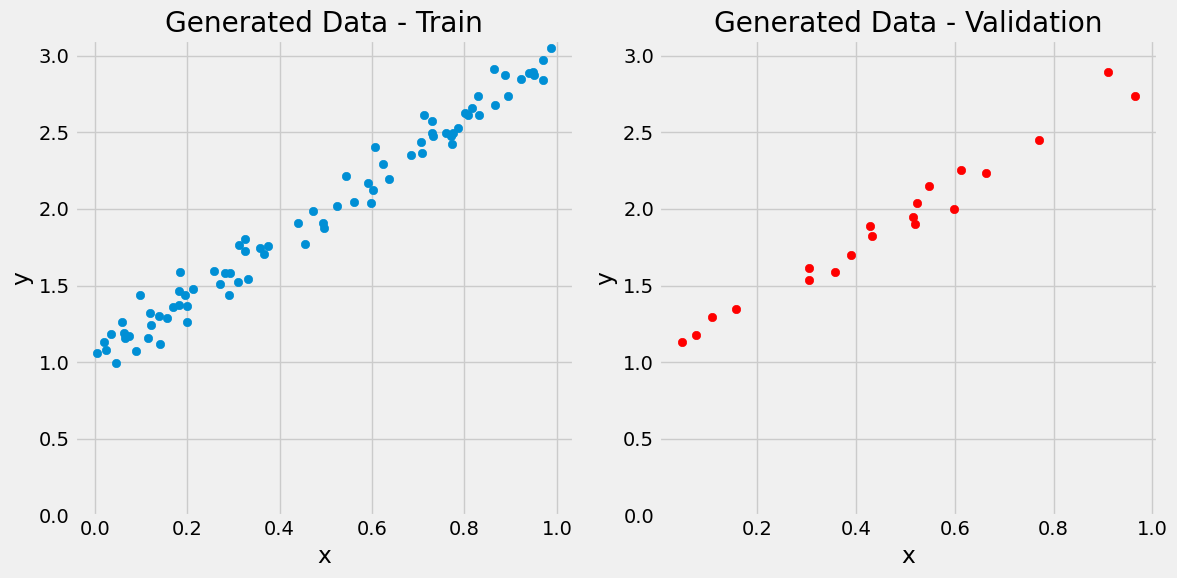

In [ ]:
# 8:2로 나눔
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[: int(N * 0.8)]
val_idx = idx[int(N * 0.8): ]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train, y_train, x_val, y_val)

## 1. 경사하강법(넘파이)

In [ ]:
## 경사하강법 (넘파이)##
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

lr = 0.1

n_epochs = 1000

for epoch in range(n_epochs):
    # 1단계: 순전파 == 머신러닝
    yhat = b + w * x_train
    # 2단계: 손실계산
    error = yhat - y_train
    # MSE
    loss = (error**2).mean()
    # 3단계: 기울기 계산
    b_grad = 2 * error.mean() #❗2(편미분)은 나중에 파이토치가 구해줄거임
    w_grad = 2 * (x_train * error).mean()
    # 4단계: 업데이트
    b = b - lr * b_grad
    w = w - lr * w_grad
    # 5단계: 1-4반복

    ## ❗3,4단계 == 역전파
    
print(b, w)


[1.02354094] [1.96896411]


## 2. scikit-learn

In [53]:
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## 3. pytorch

- 텐서
    - 숫자: 스칼라
    - 배열: 텐서
- 옵티마이저
    - 최적화 함수
- 모델

++ 파이토치 vs. tensor flow
- tensorFlow:: 흐름을 만들어서 진행 - 빠름, 변경 어렵
- pytorch:: 변경oo, 느림

In [85]:
torch.cuda.is_available()
#False:: cuda가 gpu 설정 안되어있음

False

In [80]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [79]:
# x_train_tensor = torch.as_tensor(x_train).to(device)
# x_train_tensor.cpu().numpy()

In [81]:
scalar = torch.tensor(3.14)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2,3), dtype=torch.int) # torch.타입 :: 토치꺼 쓰는게 제일 좋음  ## ❗딥러닝에서 정수를 쓰는 경우 거의 없음
tensor = torch.randn((2,3,4), dtype=torch.float) #3행 4열 2덩어리
# print(f'{scalar}, \n{vector}, \n{matrix}, \n{tensor}')
# print(scalar.size(), scalar.shape) # 차원이 없으면 아무것도 안나옴 == 스칼라

In [82]:
same_matrix = matrix.view(1,6).clone().detach()
same_matrix[0,1] = 2.0

print(matrix)
print(same_matrix)
# same_matrix를 바꿨는데 원본(matrix)도 바뀜
# (x) 변수명.new_tensor(변수명.view(1,6)):: 복사본 생성, 원본 안바뀜 => 기울기값이 어그러짐
# ❗(o) 변수명.view(1,6).clone().detach():: 복사본 생성, 원본 안바뀜 => 기울기말고 값만 가져옴

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[1, 2, 1, 1, 1, 1]], dtype=torch.int32)


++ 노트관리 잘하기
    - .ipynb => restart로 안되는 코드있는지 확인하기

### 3.1. 파이토치로 변경

- ❗파이토치를 쓸때는 가능하면 pytorch로 쓸 수 있는건 다 바꿔라ㅏ 
- ❗ loss를 최소로 맞추는 자동미분(기울기 구하기)

In [ ]:
# tensor값으로 바꾸기
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

In [ ]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # (기울기계산을 위해) 기울기를주고, 타입을 정하고, gpu쓸수있으면 써라
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

n_epochs = 1000
for epoch in range(n_epochs):
    # 순전파
    yhat = b + w * x_train_tensor
    # 오류
    error = yhat - y_train_tensor
    loss = (error**2).mean()
    #자동미분(편미분)을 함, loss의 모든 기울기를 업데이트함
    loss.backward() 

    with torch.no_grad():   # 자동미분을 멈춤
        b -= lr * b.grad    # 매개변수 업데이트 => 기울기가 변하지않기를 바람
        w -= lr * w.grad
    b.grad.zero_()  # 기울기값이 누적되어 더해지는데 y축가 수평이되는 순간 망하기 때문에
    w.grad.zero_()
print(b, w)


tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### 3.2. 옵티마이저 이용

- 손실함수를 뭘로 잡느냐에 따라 더 정교하고 잘 맞춤
- 계층으로 만들기

In [ ]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)     # float으로 바꿔서 cpu로 보냄
y_train_tensor = torch.as_tensor(y_train).float().to(device)

lr = 0.1

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1,1)).to(device)    # 연속된 Linear(1(입력값 하나), 1(출력값 하나))
optimizer = optim.SGD(model.parameters(), lr=lr)    # 장르에 따라 추천하는 옵티마이저가 있지만 최선은 아닐 수 있음
loss_fn = nn.MSELoss(reduction="mean")
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward() 
    optimizer.step()
    optimizer.zero_grad()
print(b, w)


tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### 3.3 모델 정교화

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


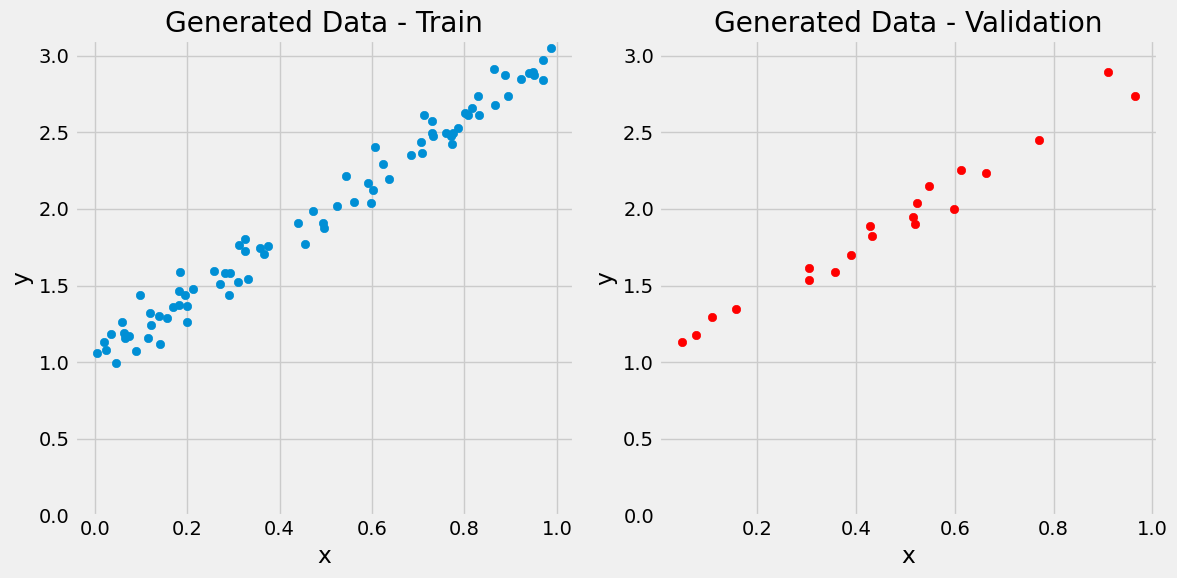

In [ ]:
# 정답지
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)   # ❗약간의 noise추가
y = true_b + ( true_w * x) + epsilon

# 2:8로 섞음
idx = np.arange(N)
np.random.shuffle(idx)
train_idx = idx[: int(N * 0.8)]
val_idx = idx[int(N * 0.8): ]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
figure1(x_train, y_train, x_val, y_val)


# 모델
x_train_tensor = torch.as_tensor(x_train).float().to(device)     # float으로 바꿔서 cpu로 보냄
y_train_tensor = torch.as_tensor(y_train).float().to(device)

lr = 0.1

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1,1)).to(device)    # 연속된 Linear(1(입력값 하나), 1(출력값 하나))
optimizer = optim.SGD(model.parameters(), lr=lr)    # 장르에 따라 추천하는 옵티마이저가 있지만 최선은 아닐 수 있음
loss_fn = nn.MSELoss(reduction="mean")
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward() 
    optimizer.step()
    optimizer.zero_grad()
print(model.)
